## Implementing simple linear regression using sklearn
We are now going to implement the same algorithm using sklearn

#### Importing Libraries

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt

#### Importing Data

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/sahdevsaini/Data-Set/main/Salary_Data.csv")

In [24]:
df.shape

(30, 2)

In [25]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#### Selecting Dependent Variable & Independent Varible 

In [53]:
X = df.iloc[:,:1]         # Independent Varible (Year Of Experiance)
y = df.iloc[:,-1]         # Dependent varible (Salary)

#### And now we split the data into training and testing. With shuffeling of course. And we reshape the training and testing X value.

In [85]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.2)

#### Then we fit our linear regression model.

In [86]:
from sklearn.linear_model import LinearRegression
simple_linear_regression = LinearRegression()
simple_linear_regression.fit(train_x,train_y)

LinearRegression()

We can then test our model with the predict function and see how well it did with the mean_squared_error function

In [87]:
from sklearn.metrics import mean_squared_error
predicted_y = simple_linear_regression.predict(test_x)
rmse = sqrt(mean_squared_error(test_y,predicted_y))

print("Root Mean Squared Error value = {}".format(rmse))

Root Mean Squared Error value = 6202.769090449295


#### Slope of best fit Line

In [88]:
m= simple_linear_regression.coef_[0]
m

9784.283835789967

#### Intercept of best Fit line

In [99]:
b = simple_linear_regression.intercept_
b

23518.159117769224

#### Equation of best fit line

In [90]:
print("Y = ({} * X)+ {}".format(b,m))

Y = (23518.159117769224 * X)+ 9784.283835789967


In [91]:
def plot_linear_regression_result(x,y,predicted_y):
    # plotting the actual points as a scatter
    plt.figure(figsize=(8,4))
    plt.scatter(x,y,color = "g", marker = "o",s=30)
    
    # plotting the regression line
    plt.plot(x, predicted_y, color = "r", linewidth=2)
 
    # putting labels
    plt.title('Linear regression of Year of Experiance & Salary')
    plt.xlabel('YearsExperience')
    plt.ylabel('Salary')
 
    # function to show plot
    plt.show()

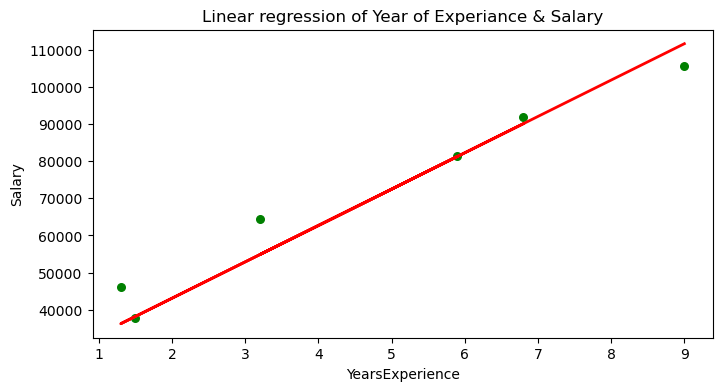

In [92]:
plot_linear_regression_result(test_x,test_y,predicted_y)

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, predicted_y)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_y, predicted_y)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(test_y, predicted_y, squared=False)

# Calculate R-squared (R2) Score
r2 = r2_score(test_y, predicted_y)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 4641.163344111464
Mean Squared Error (MSE): 38474344.38943317
Root Mean Squared Error (RMSE): 6202.769090449295
R-squared (R2) Score: 0.9340019094387474


#### Accuracy of model

In [94]:
print("Accuacy of model:-", r2*100)

Accuacy of model:- 93.40019094387473


#### Predication model

In [95]:
def predication(X):
    Y = (26858.283390428558 * X)+ 9257.234097109678
    return Y

In [96]:
predication(2.2)

68345.45755605251

#### Comparsion of Predicated value & Actual value

In [97]:
pd.DataFrame({"Predicated Value" : predicted_y,
              "Actual Value" : test_y})

,Predicated Value,Actual Value
25,111576.713640,105582.0
1,36237.728104,46205.0
2,38194.584871,37731.0
18,81245.433749,81363.0
8,54827.867392,64445.0
20,90051.289201,91738.0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
